### sprint 3
model building

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [3]:
imageSize = [299, 299]

In [4]:
#importing data set
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
training_set = train_datagen.flow_from_directory(
    "../../dataset/preprocessed dataset/training", target_size = (299, 299), batch_size=32, class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
    "../../dataset/preprocessed dataset/testing", target_size=(299, 299), batch_size=32, class_mode='categorical')


Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [5]:
xception = Xception(input_shape=imageSize + [3], weights='imagenet', include_top=False)
xception.layers

In [6]:
for layer in xception.layers:
    layer.trainable = False

In [7]:
x = Flatten()(xception.output)

In [8]:
prediction = Dense(64, activation="relu")(x)
prediction = Dense(32, activation="relu")(prediction)
prediction = Dense(5, activation="softmax")(prediction)

model = Model(inputs = xception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.1,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [12]:
r = model.fit(training_set, validation_data=test_set, epochs=30, steps_per_epoch=len(training_set)//32, validation_steps=len(test_set)//32,callbacks=[callback])

Epoch 1/30
3/3 [==============================] - 32s 5s/step - loss: 18.2486 - accuracy: 0.3958 - auc: 0.6378
Epoch 2/30
3/3 [==============================] - 13s 4s/step - loss: 15.0817 - accuracy: 0.5000 - auc: 0.6915
Epoch 3/30
3/3 [==============================] - 14s 4s/step - loss: 6.0575 - accuracy: 0.5729 - auc: 0.7501
Epoch 4/30
3/3 [==============================] - 15s 5s/step - loss: 3.7073 - accuracy: 0.6458 - auc: 0.8373
Epoch 5/30
3/3 [==============================] - 13s 4s/step - loss: 2.4419 - accuracy: 0.5938 - auc: 0.8370
Epoch 6/30
3/3 [==============================] - 14s 5s/step - loss: 1.5584 - accuracy: 0.6771 - auc: 0.8772
Epoch 7/30
3/3 [==============================] - 14s 4s/step - loss: 2.1332 - accuracy: 0.6458 - auc: 0.8626
Epoch 8/30
3/3 [==============================] - 13s 4s/step - loss: 1.5311 - accuracy: 0.5833 - auc: 0.8604
Epoch 9/30
3/3 [==============================] - 13s 4s/step - loss: 2.6576 - accuracy: 0.5625 - auc: 0.8206
Epoch 10

In [13]:
model.save("updated_Xception.h5")

### testing

In [6]:
model = load_model('updated_Xception.h5')

In [7]:
predicted = model.predict(test_set)

23/23 [==============================] - 124s 5s/step


In [8]:
actualClass = test_set.classes


In [9]:
_prediction = np.argmax(predicted, axis=1)
_prediction

array([0, 4, 0, 0, 0, 1, 3, 0, 4, 0, 0, 0, 0, 1, 0, 3, 2, 0, 4, 2, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 4, 0, 0, 1, 2, 3, 0, 0, 4, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       3, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 4, 2, 0, 0, 0,
       0, 0, 4, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0, 1,
       4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 2, 4, 4, 3, 0, 0, 2, 0, 0, 1, 0, 4, 0, 1, 4, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 4, 0, 4, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 4, 4, 0, 0, 4, 0, 3, 0, 0, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 4, 3, 4, 0, 4, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 2, 0, 0, 3, 0, 0,
       4, 1, 3, 3, 4, 0, 0, 4, 1, 0, 3, 2, 0, 3, 0,

In [10]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actualClass, _prediction)
confusion_matrix


array([[222,  34,  42,  25,  38],
       [ 46,   7,   9,   5,   7],
       [113,  29,  21,  16,  21],
       [ 20,   5,   8,   2,   4],
       [ 28,  11,   8,   2,  11]], dtype=int64)

In [11]:
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix)


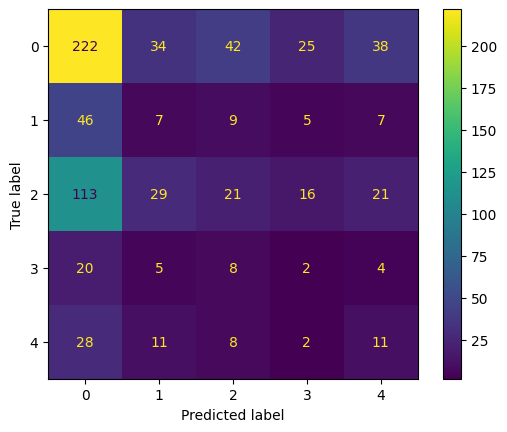

In [12]:
cm_display.plot()
plt.show()


In [13]:
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(actualClass, _prediction))
print('Precision score is :', metrics.precision_score(
    actualClass, _prediction, average='weighted'))
print('Recall score is :', metrics.recall_score(
    actualClass, _prediction, average='weighted'))
print('F1 Score is :', metrics.f1_score(
    actualClass, _prediction, average='weighted'))
print('Cohen Kappa Score:', metrics.cohen_kappa_score(actualClass, _prediction))
print('\t\tClassification Report:\n', metrics.classification_report(actualClass,_prediction,target_names=['0', '1', '2', '3', '4']))

Accuracy score is : 0.3583106267029973
Precision score is : 0.34096711921057654
Recall score is : 0.3583106267029973
F1 Score is : 0.3401189605226112
Cohen Kappa Score: 0.02095363240662329
		Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.61      0.56       361
           1       0.08      0.09      0.09        74
           2       0.24      0.10      0.15       200
           3       0.04      0.05      0.04        39
           4       0.14      0.18      0.16        60

    accuracy                           0.36       734
   macro avg       0.20      0.21      0.20       734
weighted avg       0.34      0.36      0.34       734



#### PR Curve

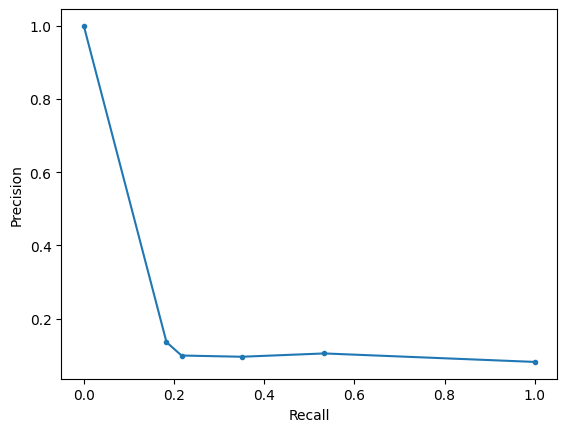

In [28]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(actualClass, _prediction, pos_label=4)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

#### ROC CURVE


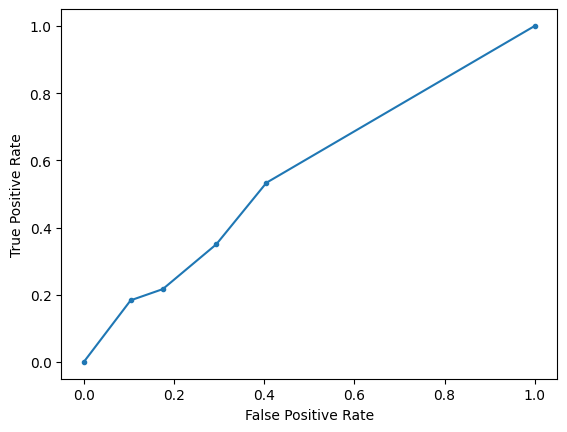

In [26]:
fpr, tpr, thresholds = roc_curve(actualClass, _prediction, pos_label=4)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
